<a href="https://colab.research.google.com/github/hyunjeo/Project/blob/main/AI_13_%EA%B9%80%ED%98%84%EC%A0%95_section2_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 선정 이유 : 은행에서 고객들을 유지하는 것은 중요한 일이다. 따라서 신용카드를 해지할 가능성이 높은 고객들을 미리 예측해 대비하는 것이 중요하다고 생각되어 선정

## 문제정의 : 고객의 이탈 여부를 안전하게 예측


## 1. 데이터셋 불러오기

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BankChurners.csv to BankChurners.csv


In [ ]:
import pandas as pd

df = pd.read_csv('BankChurners.csv')

In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


### 1.1 Feature

### CLIENTNUM : 고객 식별 번호

### Attrition_Flag : 계정이 폐쇄된 경우 1 그렇지 않으면 0

### Customer_Age : 고객 연령

### Gender : 성별

### Dependent_count : 부양가족 수

### Education_Level : 계좌 보유자의 학력

### Marital_Status : 기혼, 미혼, 이혼, 불명

### Income_Category : 계좌 소유자의 연간 소득 범주

### Card_Category : 카드 유형(블루, 실버, 골드, 플래티넘)

### Months_on_book : 은행과의 관계기간(거래 기간)

### Total_Relationship_Count : 고객이 보유한 제품의 수

### Months_Inactive_12_mon : 지난 12개월 동안 비활성 개월 수

### Contacts_Count_12_mon : 지난 12개월 동안의 연락처 수

### Credit_Limit : 신용 카드의 신용 한도

### Total_Revolving_Bal : 신용 카드의 총 회전 잔액

### Avg_Open_To_Buy : 신용 한도 구매 가능(최근 12개월 평균)

### Total_Amt_Chng_Q4_Q1 : 거래 금액 변경(Q1 대비 Q4)

### Total_Trans_Amt : 총 거래 금액(지난 12개월)

### Total_Trans_Ct : 총 거래 건수(지난 12개월)

### Total_Ct_Chng_Q4_Q1 : 거래 수의 변화(Q1 대비 Q4)

### Avg_Utilization_Ratio : 평균 카드 이용률


In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, plot_confusion_matrix, roc_curve
import scikitplot as skplt
import warnings
warnings.filterwarnings("ignore")
plt.style.use('classic')
%matplotlib inline

## 2. 데이터 전처리

### 2.1 EDA

In [ ]:
df_copy = df.copy()

In [ ]:
# 마지막 2개 칼럼, 고객번호 칼럼 삭제
df_copy = df_copy.iloc[:, 1:-2]
df_copy.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
# 데이터 결측치 확인
df_copy.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [ ]:
# 데이터 중복값 확인
df_copy.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10122    False
10123    False
10124    False
10125    False
10126    False
Length: 10127, dtype: bool

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

### 2.2 시각화

In [ ]:
# 수치의 크기를 색상 온도로 확인
df_copy.describe().T.style.background_gradient(subset = ['mean']).background_gradient(subset = ['std']).background_gradient(subset=['max']).background_gradient(subset=['75%'])

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.000000,46.325960,8.016814,26.000000,41.000000,46.000000,52.000000,73.000000
Dependent_count,10127.000000,2.346203,1.298908,0.000000,1.000000,2.000000,3.000000,5.000000
Months_on_book,10127.000000,35.928409,7.986416,13.000000,31.000000,36.000000,40.000000,56.000000
Total_Relationship_Count,10127.000000,3.812580,1.554408,1.000000,3.000000,4.000000,5.000000,6.000000
Months_Inactive_12_mon,10127.000000,2.341167,1.010622,0.000000,2.000000,2.000000,3.000000,6.000000
Contacts_Count_12_mon,10127.000000,2.455317,1.106225,0.000000,2.000000,2.000000,3.000000,6.000000
Credit_Limit,10127.000000,8631.953698,9088.776650,1438.300000,2555.000000,4549.000000,11067.500000,34516.000000
Total_Revolving_Bal,10127.000000,1162.814061,814.987335,0.000000,359.000000,1276.000000,1784.000000,2517.000000
Avg_Open_To_Buy,10127.000000,7469.139637,9090.685324,3.000000,1324.500000,3474.000000,9859.000000,34516.000000
Total_Amt_Chng_Q4_Q1,10127.000000,0.759941,0.219207,0.000000,0.631000,0.736000,0.859000,3.397000


In [ ]:
# Changing the Attrition_Flag to 0 and 1

df_copy["Attrition_Flag"] = df_copy["Attrition_Flag"].map({"Existing Customer":0, "Attrited Customer":1})

In [ ]:
# 카테고리 칼럼과 수 칼럼 나누기
num_cols = list(df_copy.select_dtypes(['int64','float64']))
cate_cols = list(df_copy.select_dtypes('object'))

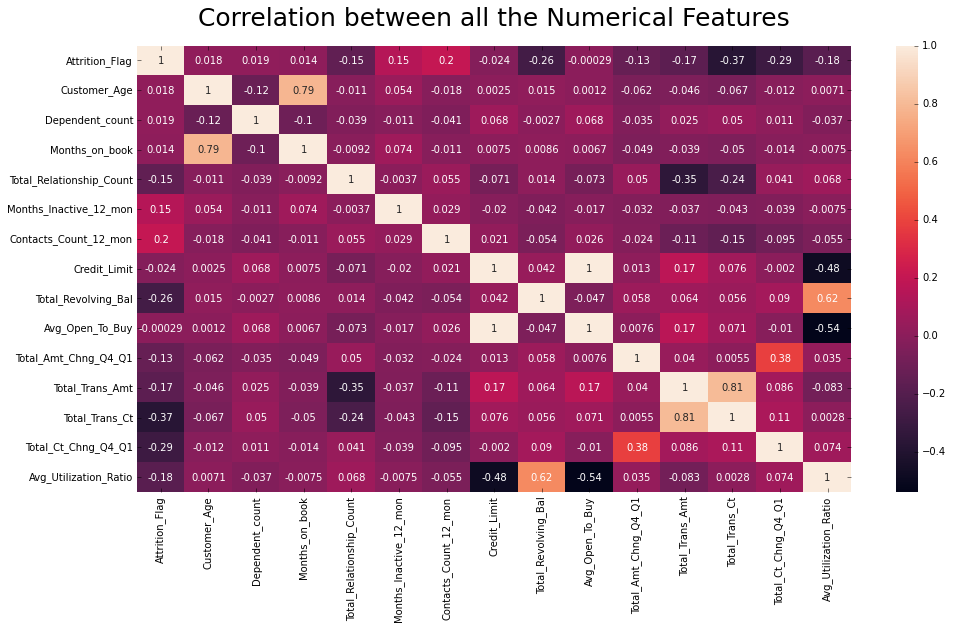

In [ ]:
# heatmap of numerical data

heat = df_copy.corr() # correlation of numerical data
plt.figure(figsize=[16,8])
plt.title("Correlation between all the Numerical Features", size=25, pad=20)
sns.heatmap(heat, annot=True)
plt.show()

### 2.3 타겟 설정

In [ ]:
#타겟의 갯수를 확인한다.
df_copy['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

## 3. 모델링

### 3.1 유의성확인

In [ ]:
# 가정: 소득수준에 따른 카드 등급차이가 있다.
from scipy.stats import chi2_contingency
obs2 = pd.crosstab(df_copy['Income_Category'], df_copy['Card_Category'])
print('P-value :',chi2_contingency(obs2, correction = True)[1])

P-value : 1.2106873689789959e-14


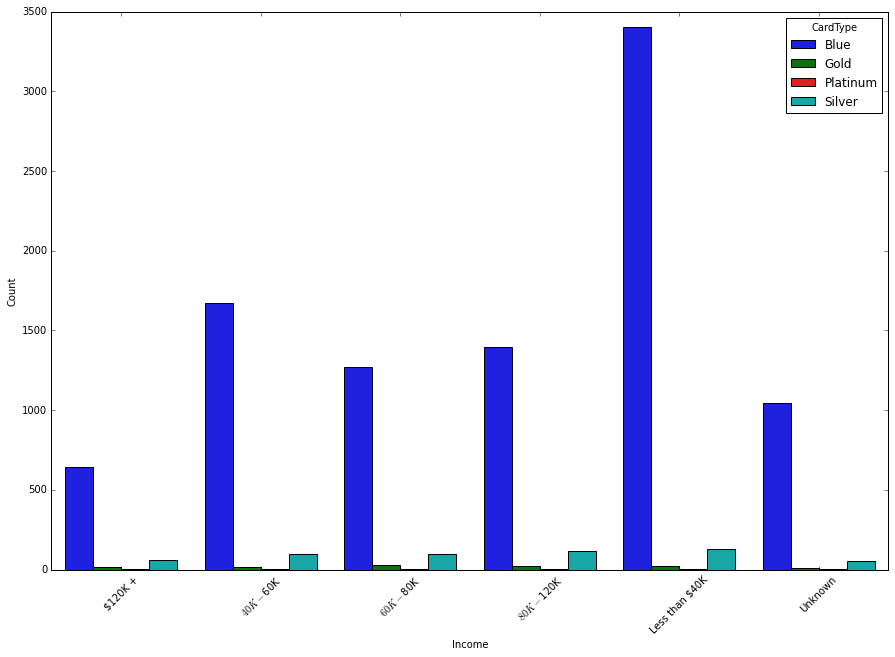

In [ ]:
# 소득수준이 높을수록 높은 등급의 카드를 사용한다.
d =df_copy.groupby(['Income_Category','Card_Category'])['Gender'].count().reset_index()
d.columns = ['Income','CardType','Count']
plt.figure(figsize=(15,10))
plt.xticks(rotation =45)
sns.barplot(x='Income', y='Count', hue='CardType',data=d)

In [ ]:
# 장기고객의 이탈률(2년 이상은 장기 고객이라고 판단)

print('2년 이상 거래했으나 떠난 사람들',round(len(df_copy.loc[(df_copy.Months_on_book >= 24) & (df_copy.Attrition_Flag == 1)])/len(df_copy.loc[df_copy.Months_on_book >= 24])*100,2),'%')
print('2년 미만 거래했으나 떠난 사람들',round(len(df_copy.loc[(df_copy.Months_on_book < 24) & (df_copy.Attrition_Flag == 1)])/len(df_copy.loc[df_copy.Months_on_book< 24])*100,2),'%')

2년 이상 거래했으나 떠난 사람들 16.2 %
2년 미만 거래했으나 떠난 사람들 14.26 %


In [ ]:
# 가정: 은행과의 거래기간과 계정 폐기가 연관이 있다.
obs2 = pd.crosstab(df_copy['Attrition_Flag'], df_copy['Months_on_book'])
print('P-value :',chi2_contingency(obs2, correction = True)[1])

P-value : 0.05742908739736116


In [ ]:
df1 = pd.DataFrame(df_copy[['Total_Revolving_Bal','Attrition_Flag']].value_counts()).reset_index()
df1.columns = ['balance', 'Flag','count']
df1.sort_values('balance',ascending=False, inplace=True)
df1 = df1.reset_index(drop=True)
df1

,balance,Flag,count
0,2517,0,350
1,2517,1,158
2,2514,1,1
3,2514,0,2
4,2513,1,1
...,...,...,...
2350,145,1,1
2351,134,1,1
2352,132,1,1
2353,0,1,893


In [ ]:
print('1449 이상의 잔액이 남았으나 떠난 사람들',round(len(df1.loc[(df1.balance > 1449) & (df_copy.Attrition_Flag == 1)])/len(df1.loc[df1.balance > 1449] )*100,2),'%')
print('1449 이상의 잔액이 남아서 유지하는 사람들',round(len(df1.loc[(df1.balance > 1449) & (df_copy.Attrition_Flag == 0)])/len(df1.loc[df1.balance > 1449] )*100,2),'%')
print('1449 미만의 잔액이 남았으나 떠난 사람들',round(len(df1.loc[(df1.balance < 1449) & (df_copy.Attrition_Flag == 1)])/len(df1.loc[df1.balance < 1449] )*100,2),'%')

1449 이상의 잔액이 남았으나 떠난 사람들 9.95 %
1449 이상의 잔액이 남아서 유지하는 사람들 90.05 %
1449 미만의 잔액이 남았으나 떠난 사람들 6.63 %


In [ ]:
# 신용 카드의 총 회전 잔액과 계정의 폐기여부가 연관이 있다.
obs3 = pd.crosstab(df_copy['Attrition_Flag'], df_copy['Total_Revolving_Bal'])
print('P-value :',chi2_contingency(obs3, correction = True)[1])

P-value : 1.6849027275135004e-38


In [ ]:
# checking imabalance

fig = px.pie(df_copy, values=df_copy['Attrition_Flag'].value_counts(), color=df_copy['Attrition_Flag'].unique(), color_discrete_map={0:"#54BAB9", 1:"#E9DAC1"},
             title='Imbalance in Target Feature', names=df_copy["Attrition_Flag"].unique())
fig.show()

### 3.2 Train, Test

In [ ]:
# 카테고리 칼럼 encoding -> get_dummies 이용

for col in cate_cols:
  dummy_cols = pd.get_dummies(df_copy[col], drop_first=True, prefix=col)
  df_copy = pd.concat([df_copy, dummy_cols], axis =1) # 바꾼 값 다시 df에 합치기
  df_copy.drop(columns=col, inplace=True)

In [ ]:
# split train, test
X = df_copy
y = df_copy.pop("Attrition_Flag")

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8, random_state=42)

In [ ]:
df_copy.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_M', 'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')

In [ ]:
num_cols

['Attrition_Flag',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [ ]:
# Normalizing the data
req_cols = num_cols[1:]

#MinMaxScaler 사용
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train[req_cols])
X_test = scaler.transform(X_test[req_cols])

In [ ]:
# imbalanced data 보정하기 - SMOTE
sm = SMOTE(random_state=42, sampling_strategy=1.0) # upsampling ratio
X_train, y_train = sm.fit_resample(X_train, y_train)

In [ ]:
# XGBoost model

xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, n_jobs=-1, n_estimators=1000, max_depth=6)
xgb_model.fit(X_train, y_train)

XGBClassifier(max_depth=6, n_estimators=1000, n_jobs=-1, random_state=42,
              use_label_encoder=False)

In [ ]:
# XGBoost Score on the test data

xgb_model.score(X_test, y_test)

0.9639684106614018

In [ ]:
# Checking the Classification Report (Hidden Input)

print(classification_report(y_test, xgb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1699
           1       0.89      0.89      0.89       327

    accuracy                           0.96      2026
   macro avg       0.93      0.93      0.93      2026
weighted avg       0.96      0.96      0.96      2026



In [ ]:
section2=['#54BAB9', '#E9DAC1','#F7ECDE','#FBF8F1']
s2 = sns.color_palette(section2)

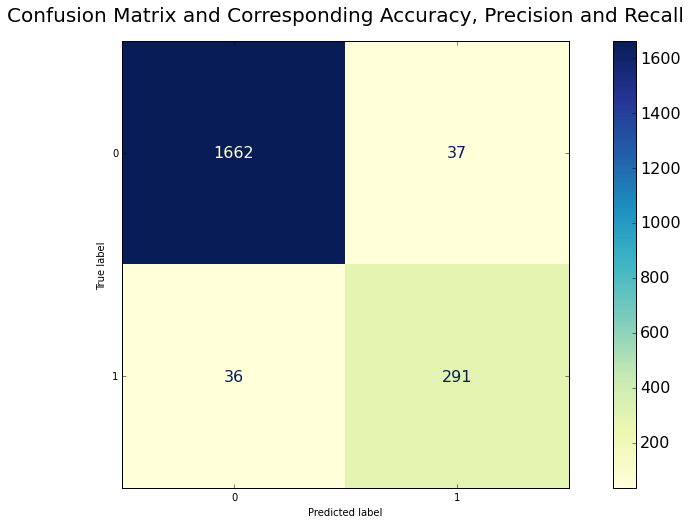

******************************
Accuracy : 0.9639684106614018
Precision : 0.9787985865724381
Recall : 0.9782224838140082
******************************


In [ ]:
cfm = confusion_matrix(y_true=y_test, y_pred=xgb_model.predict(X_test))

TP = cfm[0][0]
FN = cfm[0][1]
FP = cfm[1][0]
TN = cfm[1][1]


fig, ax = plt.subplots(figsize=(16, 8))
plt.rcParams.update({'font.size': 16}) # 내부 폰트사이즈 키우기
plt.title("Confusion Matrix and Corresponding Accuracy, Precision and Recall", size=20, pad=20)
plot_confusion_matrix(xgb_model, X_test, y_test, cmap='YlGnBu', ax=ax)
plt.grid(False)
plt.show()

print("*" * 30)
print("Accuracy :", (TP+TN)/(TP+TN+FP+FN))
print("Precision :", (TP)/(TP+FP))
print("Recall :", (TP)/(TP+FN))
print("*" * 30)

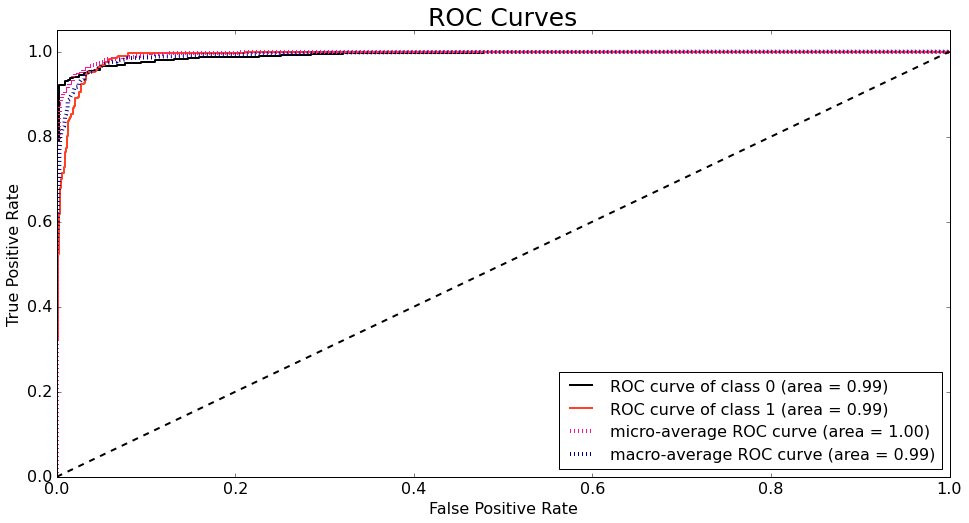

In [ ]:
#Checking the ROC curve

y_true = y_test
y_probas = xgb_model.predict_proba(X_test) # predicted probabilities generated by sklearn classifier

skplt.metrics.plot_roc(y_true, y_probas, figsize=(16,8), title_fontsize =25, text_fontsize=16, cmap = 'CMRmap')
plt.grid(False)
plt.show()

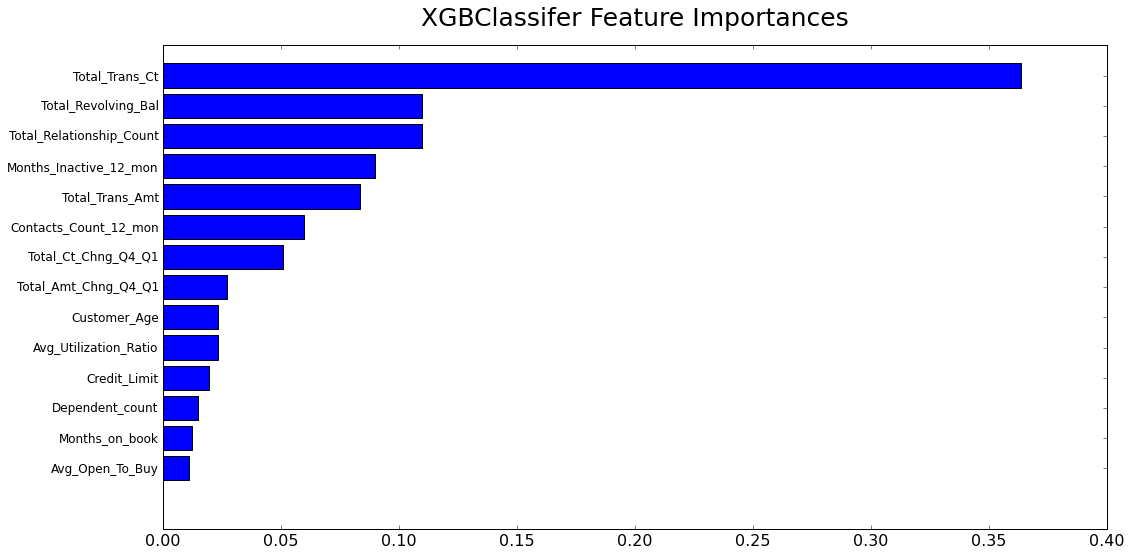

In [ ]:
feature_to_plot = 14 # feature 개수

importances = xgb_model.feature_importances_
indicies = np.argsort(importances)

best_vars = np.array(req_cols)[indicies][-feature_to_plot:]
values = importances[indicies][-feature_to_plot:]

best_vars

y_ticks = np.arange(0, feature_to_plot)
fig, ax = plt.subplots(figsize=(16, 8))
ax.barh(y_ticks, values)
ax.set_yticklabels(best_vars, size=12)
ax.set_yticks(y_ticks) # 바에 맞게 라벨 붙이기
ax.set_title("XGBClassifer Feature Importances", size=25, pad=20, color='black')
fig.tight_layout()
plt.grid(False)
plt.show()

### **은행은 수행된 탐색적 데이터 분석을 통해 어떤 고객이 이탈할 가능성이 높은지 충분히 파악할 수 있습니다.**

### **이 XGBoost 분류기 모델을 사용하여 고객의 이탈 여부를 안전하게 예측할 수 있습니다.**

### **은행에서는 기능의 중요성을 살펴봄으로써 필요한 개선 조치를 적용하여 추가적인 이탈을 완화할 수 있다.**